<a href="https://colab.research.google.com/github/moshehaimlevi/numpy.repo/blob/main/pandas7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from IPython.display import display
import pandas as pd

In [ ]:
import pandas as pd

products_df = pd.DataFrame({
'Product_ID': [1, 2, 3],
'Product_Name': ['iPhone 12', 'Samsung S21', 'Pixel 5'],
'Product_Price': [999, 899, 699],
})
display(products_df)

,Product_ID,Product_Name,Product_Price
0,1,iPhone 12,999
1,2,Samsung S21,899
2,3,Pixel 5,699


In [ ]:
import pandas as pd

sales_df = pd.DataFrame({
'Sale_ID': [1, 2, 3, 4, 5, 6, 7],
'Sale_Date': pd.to_datetime(['2021-01-01', '2021-02-01', '2021-02-15', '2020-03-01', '2020-04-01',

'2020-02-15', '2020-01-01']),
'Customer_ID': [1, 2, 3, 2, 3, 4, 4],
'Product_ID': [1, 1, 2, 2, 3, 3, 1],
})
display(sales_df)


,Sale_ID,Sale_Date,Customer_ID,Product_ID
0,1,2021-01-01,1,1
1,2,2021-02-01,2,1
2,3,2021-02-15,3,2
3,4,2020-03-01,2,2
4,5,2020-04-01,3,3
5,6,2020-02-15,4,3
6,7,2020-01-01,4,1


In [ ]:
import pandas as pd

customers_df = pd.DataFrame({
'Customer_ID': [1, 2, 3, 4],
'Customer_Name': ['John Doe', 'Jane Doe', 'Jim Brown', 'Jake Smith'],
'Customer_Age': [25, 30, 35, 20],
'Customer_Email': ['john@doe.com', 'jane@doe.com', 'jim@brown.com', 'jake@smith.com'],
})

display(customers_df)

,Customer_ID,Customer_Name,Customer_Age,Customer_Email
0,1,John Doe,25,john@doe.com
1,2,Jane Doe,30,jane@doe.com
2,3,Jim Brown,35,jim@brown.com
3,4,Jake Smith,20,jake@smith.com


In [ ]:
############################ QUESTION 1 ############################
merged_df = pd.merge(sales_df, customers_df, on='Customer_ID')

product_customer_info = merged_df.groupby('Product_ID').agg(
    customer_count=('Customer_ID', 'nunique'),
    average_age=('Customer_Age', 'mean')
).reset_index()

result_df = pd.merge(product_customer_info, products_df[['Product_ID', 'Product_Name']], on='Product_ID')

display(result_df)



,Product_ID,customer_count,average_age,Product_Name
0,1,3,25.0,iPhone 12
1,2,2,32.5,Samsung S21
2,3,2,27.5,Pixel 5


In [ ]:
############################ QUESTION 2 ############################

sales_df['Year'] = sales_df['Sale_Date'].dt.year

sales_by_year_product = sales_df.groupby(['Year', 'Product_ID']).size().reset_index(name='Total_Sales')

sales_by_year_product = pd.merge(sales_by_year_product, products_df[['Product_ID', 'Product_Name']], on='Product_ID')

display(sales_by_year_product)

,Year,Product_ID,Total_Sales,Product_Name
0,2020,1,1,iPhone 12
1,2020,2,1,Samsung S21
2,2020,3,2,Pixel 5
3,2021,1,2,iPhone 12
4,2021,2,1,Samsung S21


In [ ]:
############################ PIVOT ############################
import numpy as np
from IPython.display import display
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Sales_Funnel_CRM.csv'

df = pd.read_csv(file_path)
display(df)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Account Number,Company,Contact,Account Manager,Product,Licenses,Sale Price,Status
0,2123398,Google,Larry Pager,Edward Thorp,Analytics,150,2100000,Presented
1,2123398,Google,Larry Pager,Edward Thorp,Prediction,150,700000,Presented
2,2123398,Google,Larry Pager,Edward Thorp,Tracking,300,350000,Under Review
3,2192650,BOBO,Larry Pager,Edward Thorp,Analytics,150,2450000,Lost
4,420496,IKEA,Elon Tusk,Edward Thorp,Analytics,300,4550000,Won
5,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Analytics,300,2800000,Under Review
6,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Prediction,150,700000,Presented
7,1216870,Microsoft,Will Grates,Edward Thorp,Tracking,300,350000,Under Review
8,2200450,Walmart,Will Grates,Edward Thorp,Analytics,150,2450000,Lost
9,405886,Apple,Cindy Phoner,Claude Shannon,Analytics,300,4550000,Won


In [ ]:
############################ QUESTION 1 ############################
import numpy as np
from IPython.display import display
import pandas as pd

pivot_df = df.pivot_table(
    values='Licenses',
    index='Company',
    columns='Product',
    fill_value=0
)

display(pivot_df)

Product,Analytics,GPS Positioning,Prediction,Tracking
Company,,,,
Google,150.0,0.0,150.0,300.0
ATT,0.0,0.0,150.0,150.0
Apple,300.0,0.0,0.0,0.0
BOBO,150.0,0.0,0.0,0.0
CVS Health,0.0,0.0,0.0,450.0
Cisco,300.0,300.0,0.0,0.0
Exxon Mobile,150.0,0.0,0.0,0.0
IKEA,300.0,0.0,0.0,0.0
Microsoft,0.0,0.0,0.0,300.0


In [ ]:
############################ QUESTION 2 ############################
total_df = df.pivot_table(
    values=['Sale Price', 'Licenses'],
    index='Company',
    aggfunc={'Sale Price': 'sum', 'Licenses': 'sum'},
    fill_value=0
)
display(total_df)

,Licenses,Sale Price
Company,,
Google,600,3150000
ATT,300,1050000
Apple,300,4550000
BOBO,150,2450000
CVS Health,450,490000
Cisco,600,4900000
Exxon Mobile,150,2100000
IKEA,300,4550000
Microsoft,300,350000


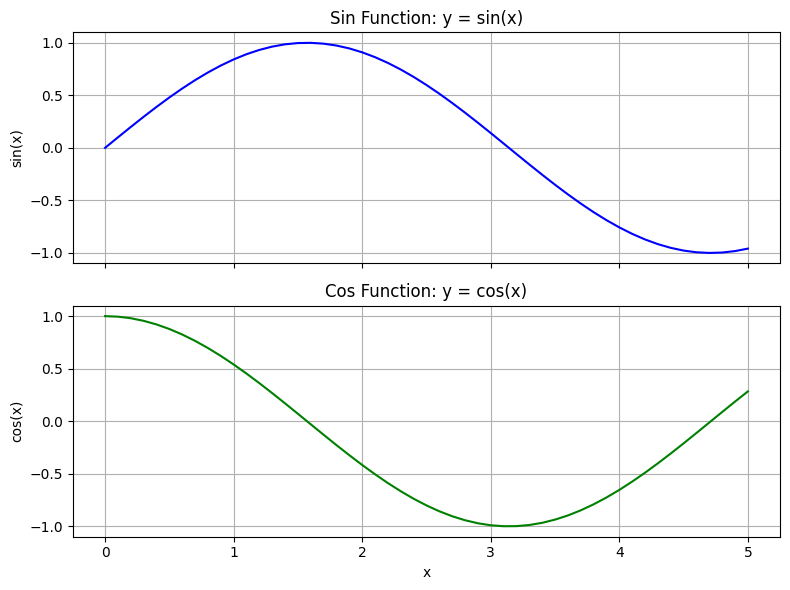

In [3]:
############################ QUESTION 3 ############################
######### MATPLOTLIB ##########
import numpy as np
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

x = np.arange(0, 5.1, 0.1)

y_sin = np.sin(x)
y_cos = np.cos(x)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

ax1.plot(x, y_sin, color='blue')
ax1.set_title('Sin Function: y = sin(x)')
ax1.set_ylabel('sin(x)')
ax1.grid(True)

ax2.plot(x, y_cos, color='green')
ax2.set_title('Cos Function: y = cos(x)')
ax2.set_xlabel('x')
ax2.set_ylabel('cos(x)')
ax2.grid(True)

plt.tight_layout()

plt.show()